# KNN

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
def gen_data():
    x0 = np.random.normal(size=50).reshape(-1, 2) - 1
    x1 = np.random.normal(size=50).reshape(-1, 2) + 1.
    x_train = np.concatenate([x0, x1])
    y_train = np.concatenate([np.zeros(25), np.ones(25)]).astype(np.int)
    return x_train, y_train

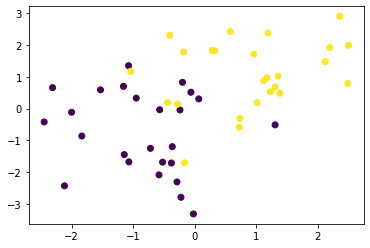

In [3]:
X_train, ys_train = gen_data()
plt.scatter(X_train[:, 0], X_train[:, 1], c=ys_train)

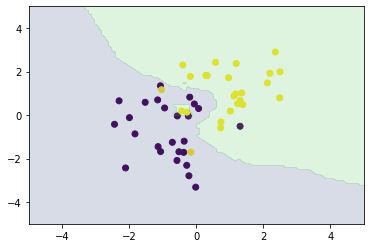

In [6]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X_train, ys_train)
plt_resut(X_train, ys_train, knc.predict(X_test))

# k-means

In [1]:
#https://datahexa.com/kmeans-clustering-with-wine-dataset/参考

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import cluster, preprocessing, datasets

from sklearn.cluster import KMeans

In [9]:
wine = datasets.load_wine()

In [10]:
X = wine.data

In [11]:
X.shape

(178, 13)

In [12]:
y=wine.target

In [13]:
y.shape

(178,)

In [14]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [17]:
model = KMeans(n_clusters=3)

In [18]:
labels = model.fit_predict(X)

In [19]:
df = pd.DataFrame({'labels': labels})
type(df)

pandas.core.frame.DataFrame

In [20]:
def species_label(theta):
    if theta == 0:
        return wine.target_names[0]
    if theta == 1:
        return wine.target_names[1]
    if theta == 2:
        return wine.target_names[2]

In [21]:
df['species'] = [species_label(theta) for theta in wine.target]

In [22]:
pd.crosstab(df['labels'], df['species'])

species,class_0,class_1,class_2
labels,,,
0,13,20,29
1,0,50,19
2,46,1,0


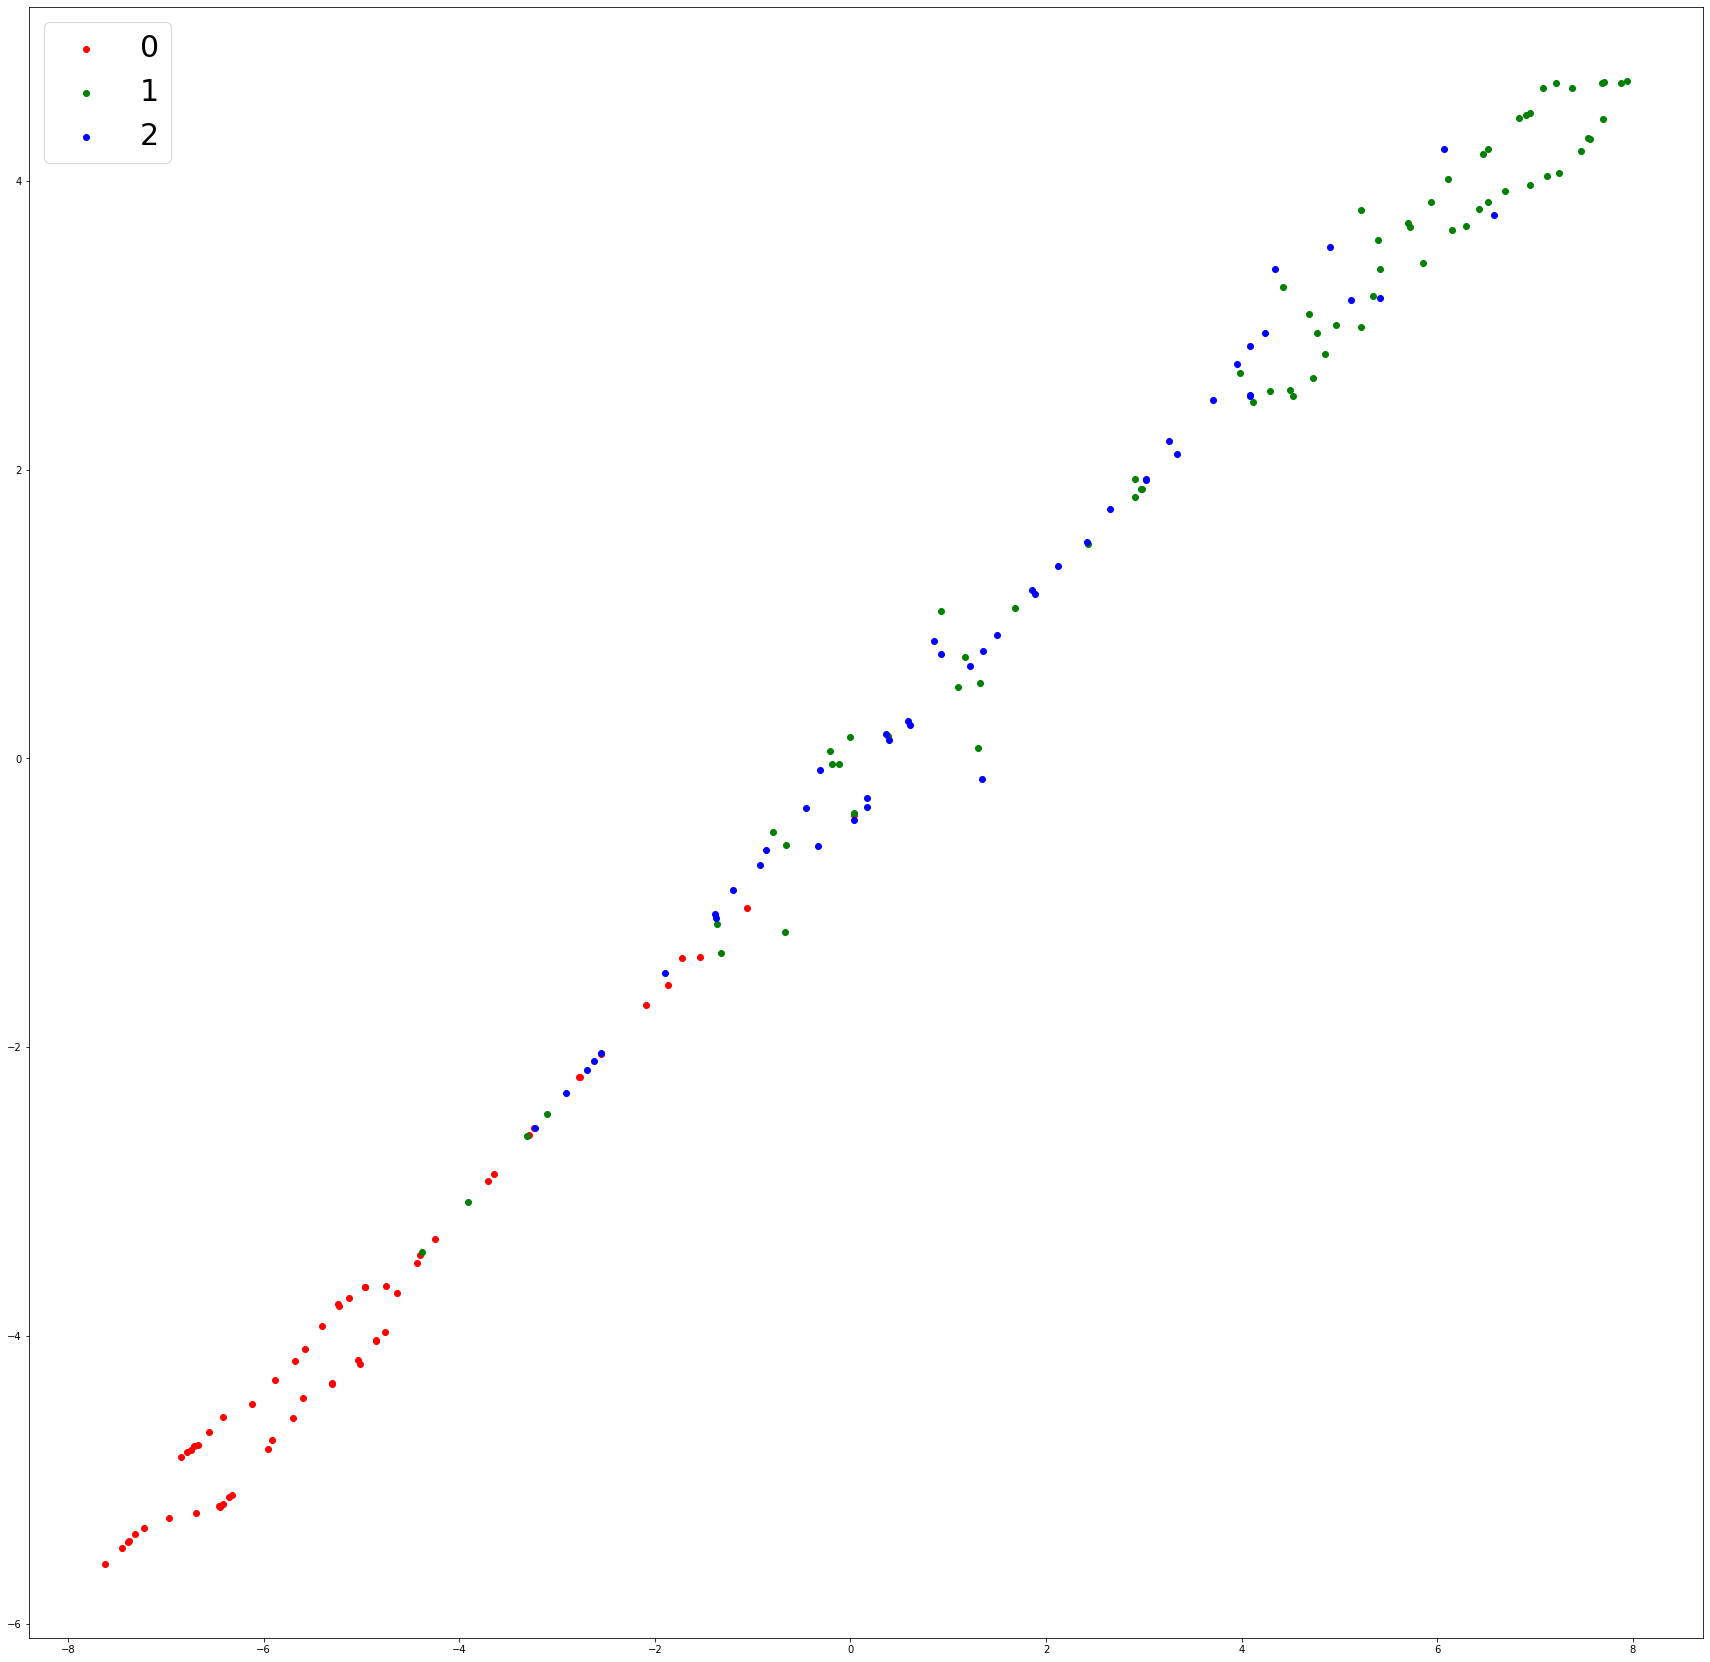

In [36]:
#t-SNEで可視化(元データ))
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state = 0, perplexity = 50, n_iter = 500)
X_embedded = tsne.fit_transform(X)

df = pd.concat([pd.DataFrame(y), pd.DataFrame(X_embedded, columns = ['col1', 'col2'])], axis = 1)

wine_list = pd.Series(y).unique()

colors =  ["r", "g", "b"]
plt.figure(figsize = (30, 30))
for i , v in enumerate(wine_list):
    tmp_df = df[df[0] == v]
    plt.scatter(tmp_df['col1'],  
                tmp_df['col2'],
                label = v,
                color = colors[i])

plt.legend(fontsize = 30)

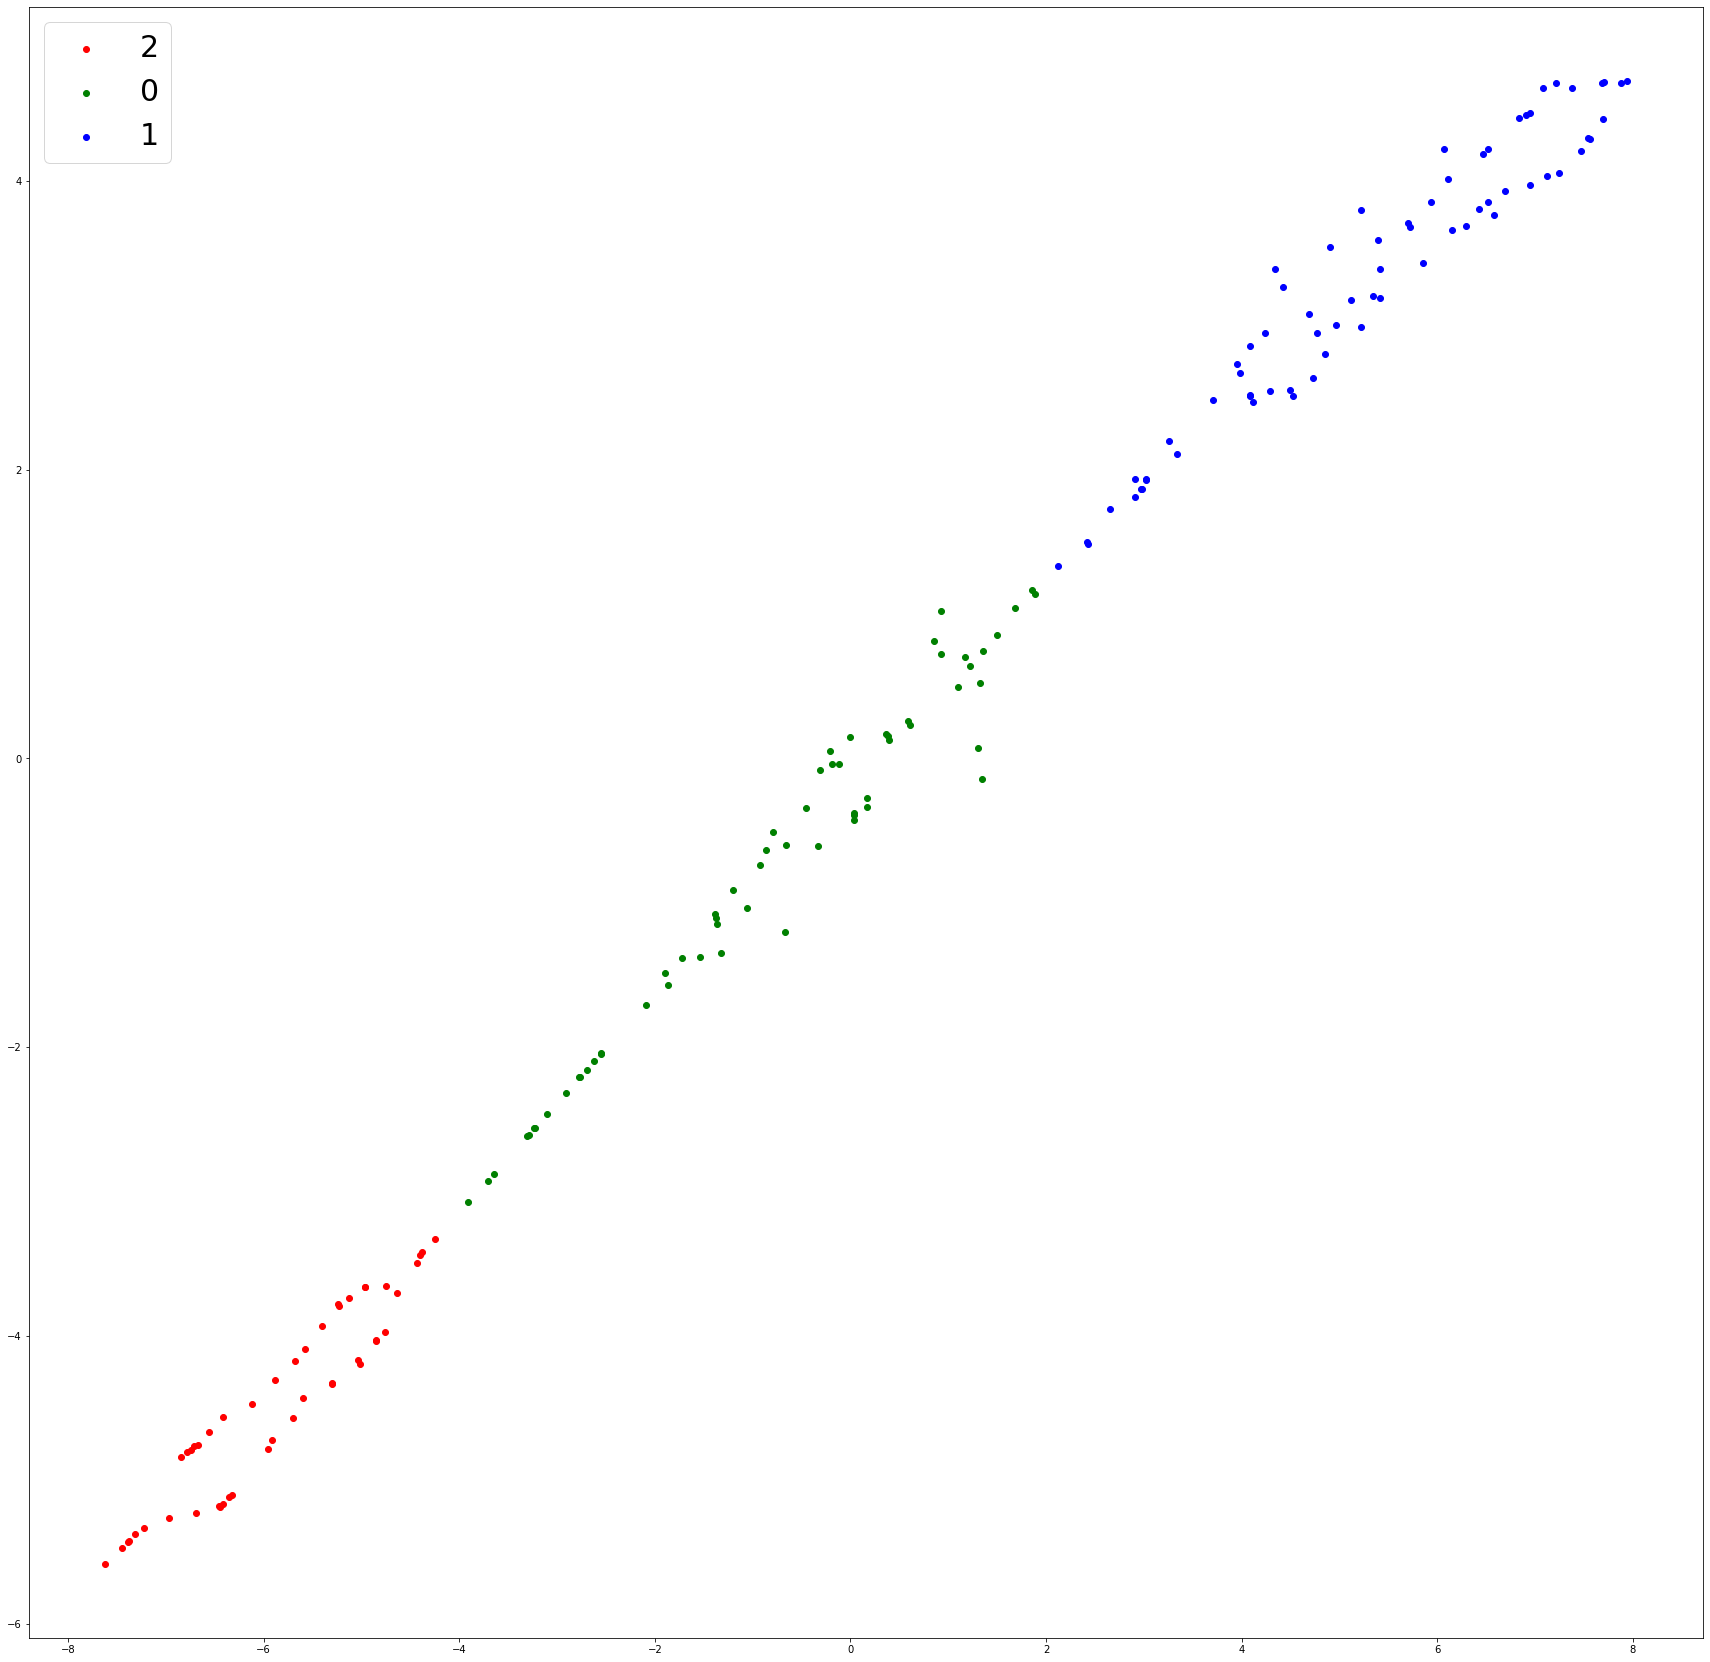

In [37]:
#t-SNEで可視化(k-meansによる分類結果))
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state = 0, perplexity = 50, n_iter = 500)
X_embedded = tsne.fit_transform(X)

df = pd.concat([pd.DataFrame(labels), pd.DataFrame(X_embedded, columns = ['col1', 'col2'])], axis = 1)

wine_list = pd.Series(labels).unique()

colors =  ["r", "g", "b"]
plt.figure(figsize = (30, 30))
for i , v in enumerate(wine_list):
    tmp_df = df[df[0] == v]
    plt.scatter(tmp_df['col1'],  
                tmp_df['col2'],
                label = v,
                color = colors[i])

plt.legend(fontsize = 30)